In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Columnas que me tocaron analizar: ["smoke", "alco", "active", "cardio"]

In [136]:
data = pd.read_csv("../data/data_limpia.csv", index_col = None)
data.head()

,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight,TAS,TAD,PP
0,2,168,62.0,1,1,0,0,1,0,50,21.97,Peso normal,40-60,"[50, 60)",62.0,110.0,80.0,30.0
1,1,156,85.0,3,1,0,0,1,1,55,34.93,Obesidad,40-60,"[50, 60)",85.0,140.0,90.0,50.0
2,1,165,64.0,3,1,0,0,0,1,51,23.51,Peso normal,40-60,"[50, 60)",64.0,130.0,70.0,60.0
3,2,169,82.0,1,1,0,0,1,1,48,28.71,Sobrepeso,40-60,"[40, 50)",82.0,150.0,100.0,50.0
4,1,156,56.0,1,1,0,0,0,0,47,23.01,Peso normal,40-60,"[40, 50)",56.0,100.0,60.0,40.0


Veo que data["weight"] y data["new_weight"] son iguales

Columnas que considero importante cruzar: 
    
    - Genero
    
    - Edad numérico
    
    - Edad categórico
    
    - IMC numérico
    
    - IMC categórico

data_male = data[data.gender == 2]

data_fem = data[data.gender == 1]

**No creamos la columna hipertension, asique la genero:**

In [137]:
# https://www.ahajournals.org/doi/10.1161/HYPERTENSIONAHA.120.15026
#  hypertension be diagnosed when a person’s systolic blood pressure (SBP)
    # in the office or clinic is ≥140 mm Hg and/or their diastolic blood pressure (DBP) is ≥90 mm Hg
mask_hta_alta = data["TAS"] >= 140
mask_hta_baja = data["TAD"] >= 90
data["hipertenso"] = np.where(mask_hta_alta | mask_hta_baja, 1 ,0)

In [138]:
data.head()

,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight,TAS,TAD,PP,hipertenso
0,2,168,62.0,1,1,0,0,1,0,50,21.97,Peso normal,40-60,"[50, 60)",62.0,110.0,80.0,30.0,0
1,1,156,85.0,3,1,0,0,1,1,55,34.93,Obesidad,40-60,"[50, 60)",85.0,140.0,90.0,50.0,1
2,1,165,64.0,3,1,0,0,0,1,51,23.51,Peso normal,40-60,"[50, 60)",64.0,130.0,70.0,60.0,0
3,2,169,82.0,1,1,0,0,1,1,48,28.71,Sobrepeso,40-60,"[40, 50)",82.0,150.0,100.0,50.0,1
4,1,156,56.0,1,1,0,0,0,0,47,23.01,Peso normal,40-60,"[40, 50)",56.0,100.0,60.0,40.0,0


In [ ]:
mis_variables = ["smoke", "alco", "active", "cardio"]

In [155]:
# Corroboro que no hay nulos

print("Valores únicos de cada columna: \n")
for i in mis_variables:
    print("- Columna '{}':".format(i), data[i].unique())
    
    #print("Shape of Original DataFrame: {}".format(df.shape))

Valores únicos de cada columna: 

- Columna 'smoke': [0 1]
- Columna 'alco': [0 1]
- Columna 'active': [1 0]
- Columna 'cardio': [0 1]


In [154]:
for i in mis_variables:
    print("Columna", i, ":")
    print(round(data[i].value_counts(normalize = True) * 100, 2))
    print("----")

Columna smoke :
0    91.03
1     8.97
Name: smoke, dtype: float64
----
Columna alco :
0    94.56
1     5.44
Name: alco, dtype: float64
----
Columna active :
1    80.35
0    19.65
Name: active, dtype: float64
----
Columna cardio :
0    50.14
1    49.86
Name: cardio, dtype: float64
----


**CRUZANDO VARIABLE SMOKE**

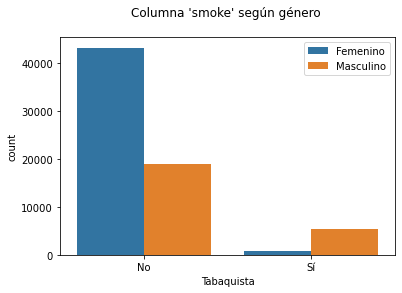

In [147]:
ax = sns.countplot(x= "smoke", data = data, hue = "gender")

plt.title("Columna 'smoke' según género \n")
plt.xlabel("Tabaquista")
ax.set_xticklabels(["No", "Sí"])
plt.legend(["Femenino", "Masculino"])

plt.show()

# Los hombres fuman más que los mujeres

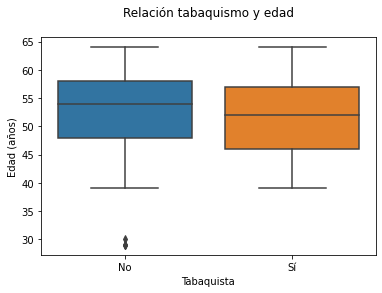

In [148]:
ax = sns.boxplot(y = "AgeinYr", data = data, x = "smoke")

plt.title("Relación tabaquismo y edad\n")
plt.ylabel("Edad (años)")
plt.xlabel("Tabaquista")
ax.set_xticklabels(["No", "Sí"])

plt.show()

# Los tabaquistas son más jóvenes

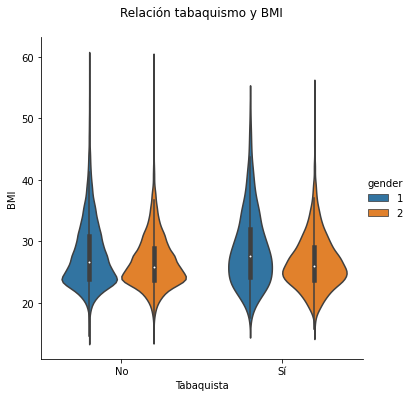

In [149]:
ax = sns.catplot(x = "smoke",
            y = "BMI",
            data = data,
            hue = "gender", 
            kind = "violin")

plt.title("Relación tabaquismo y BMI\n")
plt.ylabel("BMI")
plt.xlabel("Tabaquista")
ax.set_xticklabels(["No", "Sí"])

plt.show()

# No hay difencias en BMI/Sexo

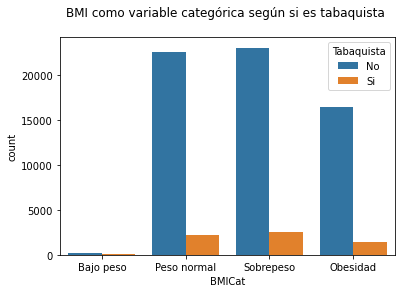

In [150]:
order_BMI = ["Bajo peso", "Peso normal", "Sobrepeso", "Obesidad"]
ax = sns.countplot(x= "BMICat", data = data, hue = "smoke", order = order_BMI)

plt.title("BMI como variable categórica según si es tabaquista \n")
#plt.xlabel("Tabaquista")
#ax.set_xticklabels(["No", "Sí"])
plt.legend(["No", "Si"], title = "Tabaquista")

plt.show()

# No hay diferencias entre las categorías de BMI y tabaquismo

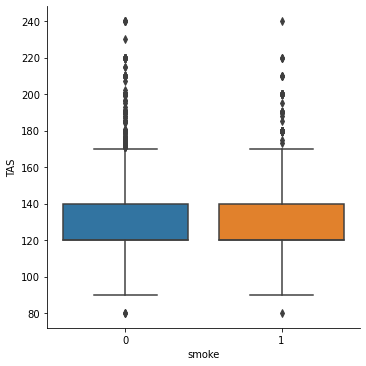

In [151]:
ax = sns.catplot(y = "TAS", data = data, x = "smoke", kind = "box")

#plt.title("Relación tabaquismo y edad\n")
#plt.ylabel("Edad (años)")
#plt.xlabel("Tabaquista")
#ax.set_xticklabels(["No", "Sí"])

plt.show()

# "strip", "swarm", "box", "violin",    "boxen", "point", "bar", or "count"

In [78]:
data.groupby("smoke")["TAS"].median()

smoke
0    120.0
1    120.0
Name: TAS, dtype: float64

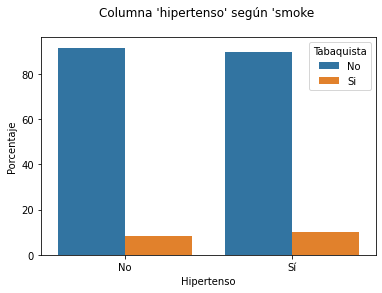

In [152]:
hipertenso_counts = (data.groupby(['hipertenso'])['smoke']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
hipertenso_counts["smoke"] = hipertenso_counts["smoke"].astype("str").map({"1": "Si", "0": "No"})

ax = sns.barplot(x = "hipertenso", y = "percentage", hue = "smoke", data = hipertenso_counts)

plt.title("Columna 'hipertenso' según 'smoke \n")
plt.xlabel("Hipertenso")
plt.ylabel("Porcentaje")
ax.set_xticklabels(["No", "Sí"])
plt.legend(title = "Tabaquista")


plt.show()

# No hay diferencias entre la el porcentaje de pacientes HTA según tabaquismo

**CRUZANDO VARIABLE ALCO**

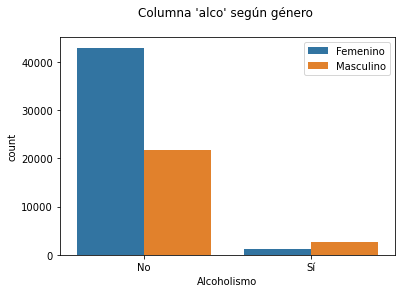

In [156]:
ax = sns.countplot(x= "alco", data = data, hue = "gender")

plt.title("Columna 'alco' según género \n")
plt.xlabel("Alcoholismo")
ax.set_xticklabels(["No", "Sí"])
plt.legend(["Femenino", "Masculino"])

plt.show()

# Los hombres toman más alcohol que las mujeres

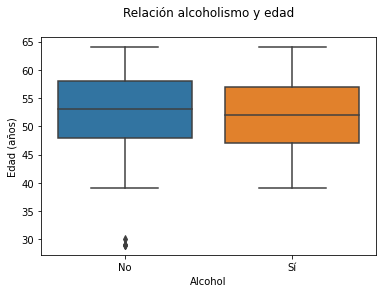

In [157]:
ax = sns.boxplot(y = "AgeinYr", data = data, x = "alco")

plt.title("Relación alcoholismo y edad\n")
plt.ylabel("Edad (años)")
plt.xlabel("Alcohol")
ax.set_xticklabels(["No", "Sí"])

plt.show()

# Sin diferencias

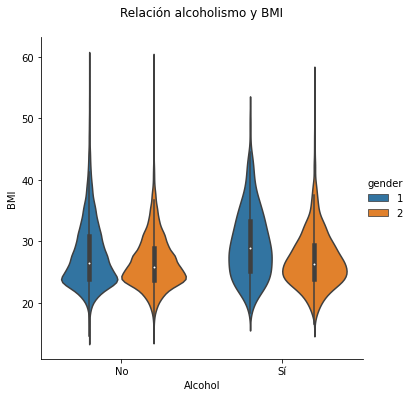

In [158]:
ax = sns.catplot(x = "alco",
            y = "BMI",
            data = data,
            hue = "gender", 
            kind = "violin")

plt.title("Relación alcoholismo y BMI\n")
plt.ylabel("BMI")
plt.xlabel("Alcohol")
ax.set_xticklabels(["No", "Sí"])

plt.show()

# No hay difencias en BMI/Sexo

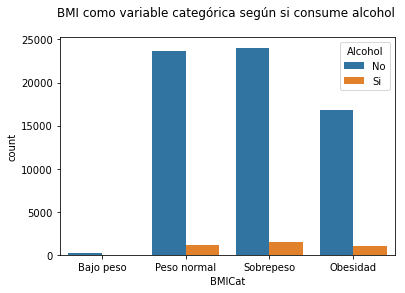

In [159]:
order_BMI = ["Bajo peso", "Peso normal", "Sobrepeso", "Obesidad"]
ax = sns.countplot(x= "BMICat", data = data, hue = "alco", order = order_BMI)

plt.title("BMI como variable categórica según si consume alcohol \n")
#plt.xlabel("Tabaquista")
#ax.set_xticklabels(["No", "Sí"])
plt.legend(["No", "Si"], title = "Alcohol")

plt.show()

# No hay diferencias entre las categorías de BMI y alcohol

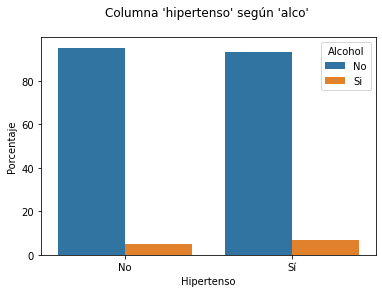

In [161]:
alco_counts = (data.groupby(['hipertenso'])['alco']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
alco_counts["alco"] = alco_counts["alco"].astype("str").map({"1": "Si", "0": "No"})

ax = sns.barplot(x = "hipertenso", y = "percentage", hue = "alco", data = alco_counts)

plt.title("Columna 'hipertenso' según 'alco' \n")
plt.xlabel("Hipertenso")
plt.ylabel("Porcentaje")
ax.set_xticklabels(["No", "Sí"])
plt.legend(title = "Alcohol")


plt.show()

# No hay diferencias entre la el porcentaje de pacientes HTA según tabaquismo

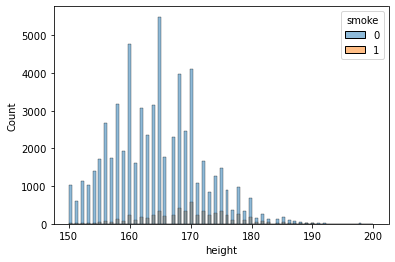

In [166]:
ax = sns.histplot(x = "height", data = data, hue = "smoke")

plt.show()

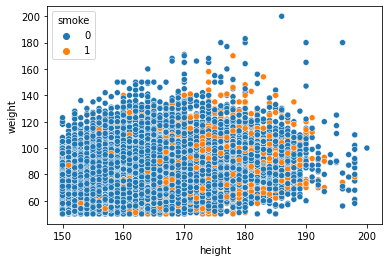

In [165]:
ax = sns.scatterplot(x = "height", y = "weight", data = data, hue = "smoke")

plt.show()

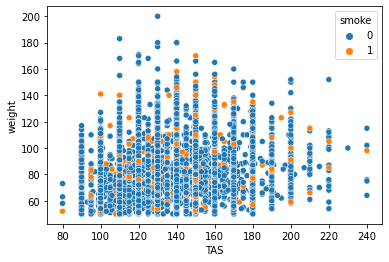

In [164]:
ax = sns.scatterplot(x = "TAS", y = "weight", data = data, hue = "smoke")

plt.show()

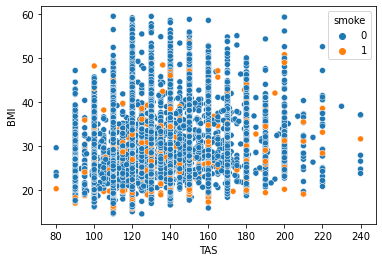

In [163]:
ax = sns.scatterplot(x = "TAS", y = "BMI", data = data, hue = "smoke")

plt.show()

In [1]:
# gender
    # 1 Male
    # 2 Female
    
# cholesterol
    # 1 low
    # 2 normal
    # high
    
# gluc
    # 1 low
    # 2 normal
    # high
    
# smoke/alcohol/activo/problemas_cardiacos
    # 0 No
    # 1 Si

In [2]:
# ["smoke", "alco", "active", "cardio"]

In [3]:
# Ejemplo de usar format
    # print("Shape of Original DataFrame: {}".format(df.shape))

In [4]:
# Para crear una sangria
line_width = 4
print("Username: LEFT")
print("".ljust(line_width) + "RIGHT"*3)

Username: LEFT
    RIGHTRIGHTRIGHT


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Health Screening Data.csv")
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60


In [7]:
df.set_index("id", inplace = True)
df.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
id,,,,,,,,,,,,,,,,,
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60


In [8]:
df.shape

(69960, 17)

In [9]:
# Buscando coherencia en los datos, ya que la prevalencia de HTA es mayor en hombres

mask_hta = df["ap_hi"] > 140
hipertensos = df[mask_hta]
prevalencia = hipertensos.gender.value_counts()
print(f"Prevalencia en hombres: {round(prevalencia[1] / hipertensos.shape[0] * 100, 2)}%")
print(f"Prevalencia en mujeres: {round(prevalencia[2] / hipertensos.shape[0] * 100, 2)}%")

Prevalencia en hombres: 61.45%
Prevalencia en mujeres: 38.55%


In [10]:
# Corroborando que esté bien pasada la edad de días a años

age = df["age"] / 365
age = age.astype("int")
edad = age == df["AgeinYr"]
edad.sum()

69960

In [11]:
df["AgeinYr"].describe()

count    69960.000000
mean        52.841109
std          6.766655
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: AgeinYr, dtype: float64

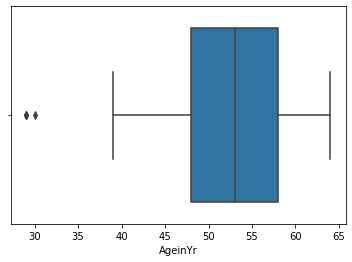

In [12]:
sns.boxplot(x = "AgeinYr", data = df)
plt.show()

In [13]:
# Removiendo outliers
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# Calculo Q1, Q3, IQR

Q1 = df["AgeinYr"].quantile(0.25)
Q3 = df["AgeinYr"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

48.0 58.0 10.0


In [14]:
# Vemos que hay 4 ptes con edad de 29/30

mask_outlier_menor = df["AgeinYr"] < (Q1 - 1.5 * IQR)
mask_outlier_mayor = df["AgeinYr"] > (Q3 + 1.5 * IQR)

df[mask_outlier_menor | mask_outlier_mayor]

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
id,,,,,,,,,,,,,,,,,
8850,6219,10878,1,175,59.0,120,80,1,1,0,0,1,0,29,19.3,Normal,20-40
31922,22343,10798,2,175,92.0,100,60,1,1,0,0,1,0,29,30.0,Obese,20-40
43842,30666,10859,1,159,59.0,120,80,1,1,0,0,1,0,29,23.3,Normal,20-40
79749,55905,10964,1,160,59.0,110,70,1,1,0,0,1,0,30,23.0,Normal,20-40


In [15]:
# Elimino los outliers

df = df[~(mask_outlier_menor | mask_outlier_mayor)]
df.shape

(69956, 17)

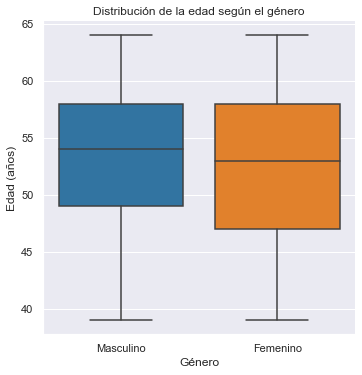

In [16]:
# Corroboro que los elminé

sns.set_style("darkgrid")
sns.set_context("notebook")

ax = sns.catplot(x = "gender",
                 y = "AgeinYr",
                 data = df,
                 kind = "box")

ax.set_xticklabels(["Masculino", "Femenino"])
plt.xlabel('Género')
plt.ylabel('Edad (años)')
plt.title("Distribución de la edad según el género")

plt.show()

# ACA EMPIEZO

In [17]:
variables = ["smoke", "alco", "active", "cardio"]

In [18]:
# Corroboro que no hay nulos

print("Valores únicos de cada columna: \n")
for i in variables:
    print("- Columna '{}':".format(i), df[i].unique())
    
    #print("Shape of Original DataFrame: {}".format(df.shape))

Valores únicos de cada columna: 

- Columna 'smoke': [0 1]
- Columna 'alco': [0 1]
- Columna 'active': [1 0]
- Columna 'cardio': [0 1]


In [19]:
for i in variables:
    print(df[i].value_counts())

0    63787
1     6169
Name: smoke, dtype: int64
0    66194
1     3762
Name: alco, dtype: int64
1    56221
0    13735
Name: active, dtype: int64
0    35002
1    34954
Name: cardio, dtype: int64


In [20]:
for i in variables:
    print(round(df[i].value_counts(normalize = True), 2))

0    0.91
1    0.09
Name: smoke, dtype: float64
0    0.95
1    0.05
Name: alco, dtype: float64
1    0.8
0    0.2
Name: active, dtype: float64
0    0.5
1    0.5
Name: cardio, dtype: float64


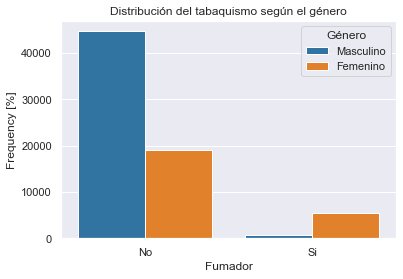

In [21]:
sns.set_style("darkgrid")
sns.set_context("notebook")

#plt.figure(figsize=(6,6))

ax = sns.countplot(x = "smoke", data = df, hue = "gender")
ax.set_xticklabels(["No", "Si"])

plt.xlabel('Fumador')
plt.ylabel('Frequency [%]')
plt.title("Distribución del tabaquismo según el género")
plt.legend(title = 'Género', labels = ["Masculino", "Femenino"])

plt.show()

In [22]:
fumador_normalizado = df["smoke"].groupby(df["gender"]).value_counts(normalize = True).rename("normalizado").reset_index()
fumador_normalizado["normalizado"] = fumador_normalizado["normalizado"] * 100
fumador_normalizado

,gender,smoke,normalizado
0,1,0,98.213148
1,1,1,1.786852
2,2,0,78.100339
3,2,1,21.899661


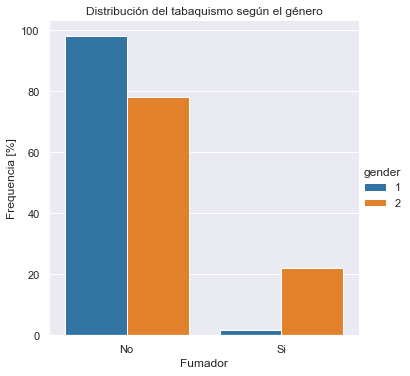

In [23]:
sns.set_style("darkgrid")
sns.set_context("notebook")

#plt.figure(figsize=(6,6))

ax = sns.catplot(x = "smoke", y = "normalizado", data = fumador_normalizado, kind = "bar", hue = "gender", legend = True)
ax.set_xticklabels(["No", "Si"])

plt.xlabel('Fumador')
plt.ylabel('Frequencia [%]')
plt.title("Distribución del tabaquismo según el género")
# plt.legend(title = 'Género', labels = ["Masculino", "Femenino"])
# 1 Male / 2 Female
plt.show()

In [24]:
alco_normalizado = df["alco"].groupby(df["gender"]).value_counts(normalize = True).rename("normalizado").reset_index()
alco_normalizado["normalizado"] = alco_normalizado["normalizado"] * 100
alco_normalizado

,gender,alco,normalizado
0,1,0,97.450493
1,1,1,2.549507
2,2,0,89.360919
3,2,1,10.639081


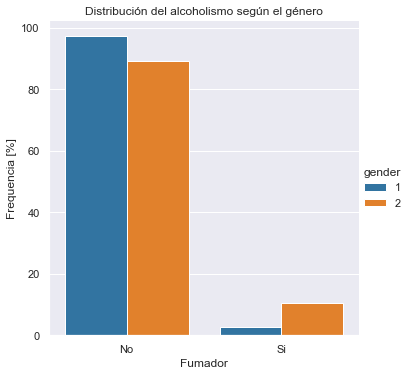

In [25]:
sns.set_style("darkgrid")
sns.set_context("notebook")

#plt.figure(figsize=(6,6))

ax = sns.catplot(x = "alco", y = "normalizado", data = alco_normalizado, kind = "bar", hue = "gender", legend = True)
ax.set_xticklabels(["No", "Si"])

plt.xlabel('Fumador')
plt.ylabel('Frequencia [%]')
plt.title("Distribución del alcoholismo según el género")
# plt.legend(title = 'Género', labels = ["Masculino", "Femenino"])
# 1 Male / 2 Female
plt.show()

In [26]:
active_normalizado = df["active"].groupby(df["gender"]).value_counts(normalize = True).rename("normalizado").reset_index()
active_normalizado["normalizado"] = active_normalizado["normalizado"] * 100
active_normalizado

,gender,active,normalizado
0,1,1,80.197367
1,1,0,19.802633
2,2,1,80.680378
3,2,0,19.319622


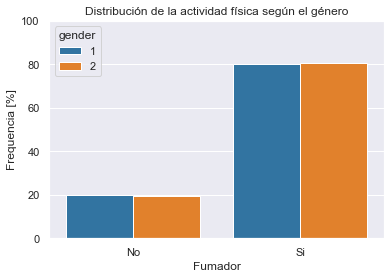

In [27]:
sns.set_style("darkgrid")
sns.set_context("notebook")

#plt.figure(figsize=(6,6))

ax = sns.barplot(x = "active", y = "normalizado", data = active_normalizado, hue = "gender")
ax.set_xticklabels(["No", "Si"])

plt.xlabel('Fumador')
plt.ylabel('Frequencia [%]')
plt.title("Distribución de la actividad física según el género")
ax.set_ylim([0, 100])
#plt.legend(title = 'Género', labels = ["Masculino", "Femenino"])
# 1 Male / 2 Female
plt.show()

In [28]:
cardio_normalizado = df["cardio"].groupby(df["gender"]).value_counts(normalize = True).rename("normalizado").reset_index()
cardio_normalizado["normalizado"] = cardio_normalizado["normalizado"] * 100
cardio_normalizado

,gender,cardio,normalizado
0,1,0,50.330777
1,1,1,49.669223
2,2,1,50.517234
3,2,0,49.482766


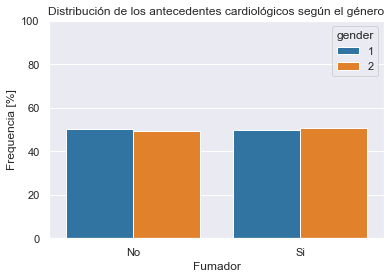

In [29]:
sns.set_style("darkgrid")
sns.set_context("notebook")

#plt.figure(figsize=(6,6))

ax = sns.barplot(x = "cardio", y = "normalizado", data = cardio_normalizado, hue = "gender")
ax.set_xticklabels(["No", "Si"])

plt.xlabel('Fumador')
plt.ylabel('Frequencia [%]')
plt.title("Distribución de los antecedentes cardiológicos según el género")
ax.set_ylim([0, 100])
# plt.legend(title = 'Género', labels = ["Masculino", "Femenino"])
# 1 Male / 2 Female
plt.show()

In [30]:
AgeinYr

NameError: name 'AgeinYr' is not defined